In [ ]:
#importing libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('Car details v3.csv')

In [ ]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
df.shape


(8128, 13)

In [ ]:
df.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [ ]:
df.isnull().sum()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
df1 = df.drop(['name','mileage', 'engine', 'max_power', 'torque'],axis=1)


In [ ]:
df1.shape


(8128, 8)

In [ ]:
df1.describe()


,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
model = LinearRegression()


In [ ]:
df1 = df.drop(['name','mileage', 'engine', 'max_power', 'torque'],axis=1)


In [ ]:
df1= pd.get_dummies(df1)
df1

,year,selling_price,km_driven,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,2014,370000,120000,5.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,2006,158000,140000,5.0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,2010,225000,127000,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
4,2007,130000,120000,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
8124,2007,135000,119000,5.0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
8125,2009,382000,120000,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
8126,2013,290000,25000,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0


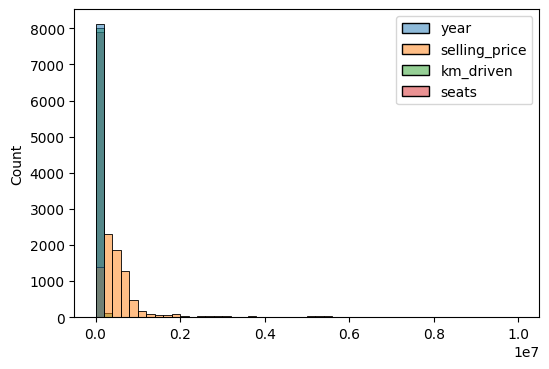

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df1,bins=50)
plt.show()

<Axes: >

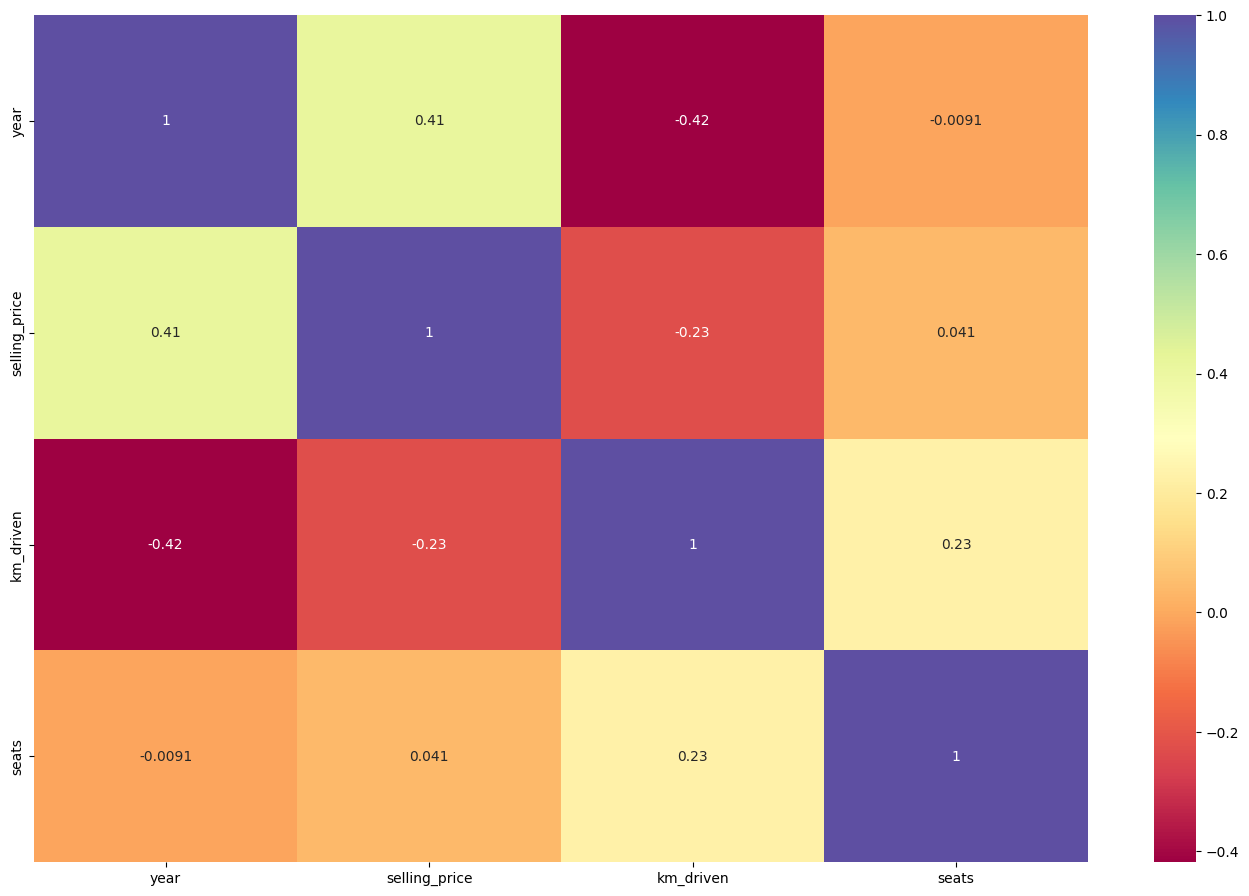

In [ ]:
plt.figure(figsize=(17,11))
sns.heatmap(df.corr(),cmap='Spectral',annot=True)

In [ ]:
df1= pd.get_dummies(df1)
df1

,year,selling_price,km_driven,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,2014,370000,120000,5.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,2006,158000,140000,5.0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,2010,225000,127000,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
4,2007,130000,120000,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
8124,2007,135000,119000,5.0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
8125,2009,382000,120000,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
8126,2013,290000,25000,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[:3000], y[:3000], test_size=0.2)




In [ ]:
df1 = df1.dropna(how = 'any')

df1.shape

(7907, 18)

In [ ]:
y = df1['selling_price']
X = df1.drop(['selling_price'], axis = 1)

In [ ]:
X


,year,km_driven,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,2014,120000,5.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,2006,140000,5.0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,2010,127000,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
4,2007,120000,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
8124,2007,119000,5.0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
8125,2009,120000,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
8126,2013,25000,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0


In [ ]:
y


0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7907, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[:3000], y[:3000], test_size=0.2)


In [ ]:
model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)


In [ ]:
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
model_accuracy = round(model.score(X_train, y_train)*100,2)
print(round(model_accuracy, 2), '%')

96.07 %


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predl = lr.predict(X_test)


In [ ]:
print(y_predl)

[ 501175.40308604  101951.52679947  240386.17659941  453609.77814855
  647063.0515255   776607.34999166 1608661.79018402  357075.13106503
  502498.22588816  387864.34153765  485968.33816108 2508915.30900489
 -465165.40063414  755970.96247998  365070.56100908  397696.81471829
  859719.77655654  272960.23147836  320229.20560656  234660.20320338
  445748.16023101  426057.36899056 -235351.56018297  462206.30341005
 -186709.05895984  398182.5352935   637282.77717513  567760.17725541
  -50305.03406145 1070200.10478896  411799.08371967  461225.45086478
  610382.49686193  813287.90465523  503426.86332618  448479.63838324
  591474.077006   1376399.52623923  651385.04617652  526703.19377898
  912982.41777743  101009.4049526   637282.77717513  714698.18745659
  386916.7640643   497339.12901023  512868.61847429 2384995.05027412
 -347399.56988288  673963.3318387   440022.18683499  364800.33530027
  339833.77374268  549011.25373235  262912.26343131  164322.54623269
  485698.11245227  297678.83958234

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print(y_pred)

[ 518527.19047619  182394.26996825  307946.65833333  493181.33333333
  776872.4487037   803808.16666667 1784700.          351933.41777778
  492287.98890924  300912.25913228  465043.48544974 2475000.
   72531.68       1024669.21934488  220012.79100529  418736.55
  960985.          372494.12255087  313226.10611111  252447.21361111
  469490.23833333  371009.96         96150.          497221.62555556
  113715.          380803.39856926  494936.49323368  594760.5
  156564.92063492  485000.23886508  236982.00532143  688931.74603175
  537455.31746032  693620.28379028  442001.98412698  383032.53825397
  453181.94444444 1186583.33        412842.85714286  522475.88577381
 1130252.5         250545.83333333  494936.49323368  819610.23809524
  184353.33166667  536250.2074255   562974.7352381  2321816.65666667
   72468.49206349  683872.78703704  358461.24278499  273659.81535856
  386652.43361268  478638.54719444  410664.29798461  354793.33333333
  770705.82666667  392754.90539683  616400.38551323  64